## 1. numpy图像数组的显示问题

In [1]:
import torch
from torch import nn
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt

(28, 28, 3)


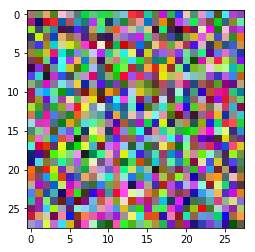

In [2]:
img = np.random.rand(28,28,3)
img = (img - img.min()) / (img.max()-img.min())   # 将原始缩放到 [0,1]
# print(img)
print(img.shape)
plt.imshow(img,cmap='gray')

(28, 28)


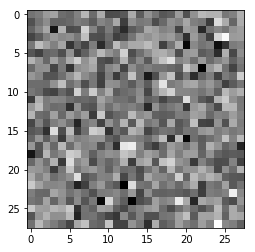

In [3]:
img = np.random.randn(28,28)
img = (img - img.min()) / (img.max()-img.min())   # 将原始缩放到 [0,1]
# print(img)
print(img.shape)
plt.imshow(img,cmap='gray')

**总结：**
1. 待显示图像的范围一定要在[0,1]内
2. 显示3通道的图像，即使设置`cmap='gray'`，仍然会显示彩色图像
3. 显示灰度图像，只能使用二维的数据，即(H,W)，如果使用三维数据(H,W,1)会报错

## 2. BCELoss函数测试

In [21]:
x = torch.randn(5,4)         # 注意标准正态分布，是 N(0,1)，但根据3sigma原则，范围大致在(-3,3)内
y = torch.randn(5,4)
scale = lambda x: (x-x.min())/(x.max()-x.min())
x, y = map(scale, [x,y])
# print(x.max(), y.min())
loss = nn.BCELoss()(x, y)       # 只要数据和标签在[0,1]内，就可以使用该函数
loss2 = F.binary_cross_entropy(x,y)
print(loss.data.item(), loss2.data.item())

3.138098955154419 3.138098955154419


In [5]:
x = np.random.randn(3,4)
print(x)
print()
print(np.max(x, 0))
print()
print(x -np.max(x, 0))

[[-0.46937579 -1.02094417 -1.21151461 -0.70221193]
 [ 0.44976038 -0.76434007 -1.08572878 -0.79867028]
 [ 0.60650504  2.02377519 -0.22116341 -0.41125228]]

[ 0.60650504  2.02377519 -0.22116341 -0.41125228]

[[-1.07588083 -3.04471936 -0.9903512  -0.29095965]
 [-0.15674466 -2.78811525 -0.86456537 -0.387418  ]
 [ 0.          0.          0.          0.        ]]


In [6]:
import torchvision.utils as t
print(dir(t))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'irange', 'make_grid', 'math', 'save_image', 'torch']


### 损失函数的公式：

nn.BCELoss

$$\ell(x, y) = L = \{l_1,\dots,l_N\}^\top, \quad
    l_n = - w_n \left[ y_n \cdot \log x_n + (1 - y_n) \cdot \log (1 - x_n) \right]$$

nn.CrossEntropyLoss

$$\text{loss}(x, class) = -\log\left(\frac{\exp(x[class])}{\sum_j \exp(x[j])}\right)
                   = -x[class] + \log\left(\sum_j \exp(x[j])\right)$$

## 3. unsqueeze函数

In [7]:
a = torch.tensor([1,5,3,4])
print(a.shape)
b = a.unsqueeze(1)
print(b.shape)
c = a.unsqueeze(0)
print(c.shape)

torch.Size([4])
torch.Size([4, 1])
torch.Size([1, 4])


In [8]:
a.numpy()

array([1, 5, 3, 4], dtype=int64)

In [9]:
a[a.numpy().argsort()]           # 排序

tensor([1, 3, 4, 5])

## 4. plot只能按照x自身元素的的顺序画图，无法区别大小

In [10]:
import matplotlib.pyplot as plt
np.random.seed(7)

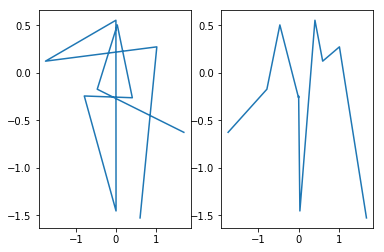

In [11]:
x = np.random.randn(10)
y = np.random.randn(10)
plt.subplot(121)
plt.plot(x,y)                # 无序的数据画图的结果，尤其是画连续的曲线时需注意!!!
plt.subplot(122)
x = x[x.argsort()]           # 对x进行排序可以画出按顺序的直线
plt.plot(x,y)                # 排序的数据画的结果

## 5. filter过滤函数

In [61]:
list(filter(lambda x: x[-1]==6, [[1,2,0],[1,2,3],[1,2,6],[1,2,0]]))

[[1, 2, 6]]

In [62]:
# 1.打印素数,除2的偶数都不是素数，所以从大于3的奇数中选就行
# 这些高阶函数只需转入函数名就行，传入的参数一般只有一个
def _odd_iter():   # 产生奇数的惰性序列，无穷的
    n = 1
    while True:
        n += 2
        yield n
        
def _not_divisible2(n):
    return lambda x: x % n > 0
#     return lambda x: True

def primes():
    yield 2
    it = _odd_iter() # 初始序列
    while True:
        n = next(it) # 返回序列的第一个数
        yield n
        it = filter(_not_divisible2(n), it) # 构造新序列，注意这里使用函数调用，但返回值是函数
        
# 打印100以内的素数:
print('100内的素数:')
for n in primes():
    if n < 100:
        print(n, end=' ')
    else:
        break

100内的素数:
2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 97 

## 6. shuffle

In [66]:
import random
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
random.shuffle(a)          # 作用于多维数组会出现重复的行
a

array([[1, 2, 3],
       [1, 2, 3],
       [4, 5, 6]])

In [72]:
import random
a = np.arange(10)
random.shuffle(a)          # 作用于一维数组不会出现重复
a

array([9, 8, 0, 4, 6, 1, 3, 5, 7, 2])

## 7.IntTensor中的整除符号 '/'

In [78]:
a = torch.IntTensor([1,2,3])
a
print(a / 3)                  # PyTorch中的整型tensor使用整除
print(a.float() / 3)

tensor([0, 0, 1], dtype=torch.int32)
tensor([0.3333, 0.6667, 1.0000])


In [85]:
print(4 / 5)                # python中 '/'表示普通的除法
print(3 // 5)               # python中 '//'表示整除    

0.8
0


In [22]:
from torch import nn